Today's article was inspired by a question that came up on a Korean mathematics Facebook group I'm part of. The gist of the question could probably be translated into something like this:

> Why is it that prime numbers, when plotted on polar coordinates, show patterns, such as spirals or lines?

I was very intrigued by this question and ended up learning quite a lot from [3Blue1Brown's video](https://www.youtube.com/watch?v=EK32jo7i5LQ) that touched on exactly this same topic. In this post, we'll take a brief detour from our deep learning studies and dive into the world of some pure mathematics and number theory.

# Plot Creation

To start, it is first necessary for us to actually see what these patterns are like. You could, of course, look at 3Blue1Brown's excellent video visualizations, but I also think there is value in trying this out for oneself. Let's start our exploration by importing basic modules.

In [65]:
import math
import sympy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.style.use('dark_background')

One module that I'm using here that I normally don't use is SymPy, a Python library for symbolic mathematics. While SymPy offers a wide ranges of features for computing, I'm using it simply to generate prime numbers.

In [2]:
print(list(sympy.primerange(0, 100)))

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


## Polar Coordinates

First, let's write a function that accepts some number as input and transforms it into cartesian representation of polar coordinates. The output itself is cartesian, but the coordinates they represent correspond to polar coordinate locations. We could understand this function as a transformation $C: \mathbb{R} \to \mathbb{R}^2$ such that

$$
C(x) = (x \cos(x), x \sin(x))
$$

In Python, we can implement this translation as follows:

In [52]:
def get_coordinate(num):
    return num * np.cos(num), num * np.sin(num)

Let's perform a quick sanity check and see that $C(1)$ returns some point on the first quadrant.

In [53]:
get_coordinate(1)

(0.5403023058681398, 0.8414709848078965)

Great! However, one problem with the current setup is that it is not vectorized; in order to generate coordinates for, say, ten numbers, we would need a for loop to generate coordinates for each of the ten numbers. 

The good news is that we can take advantage of NumPy's vectorization. Namely, if the input is a NumPy `ndarray`, then we can process multiple numbers in parallel without a need for time-consuming loops.

In [55]:
x = np.arange(1, 10)
get_coordinate(x)

(array([ 0.54030231, -0.83229367, -2.96997749, -2.61457448,  1.41831093,
         5.76102172,  5.27731578, -1.16400027, -8.20017236]),
 array([ 0.84147098,  1.81859485,  0.42336002, -3.02720998, -4.79462137,
        -1.67649299,  4.59890619,  7.91486597,  3.70906637]))

Below is a helper function we will use to make plot creation easier. It will also save us from writing a lot of repeated boilerplate code.

In [98]:
def create_plot(nums, figsize=8, s=None, show_annot=False):
    nums = np.array(list(nums))
    x, y = get_coordinate(nums)
    plt.figure(figsize=(figsize, figsize))
    plt.axis("off")
    plt.scatter(x, y, s=s)
    plt.show()

Now, we have all the tools we need to visualize these patterns. Lo and behold, here is the visualization with the first 1000 prime numbers.

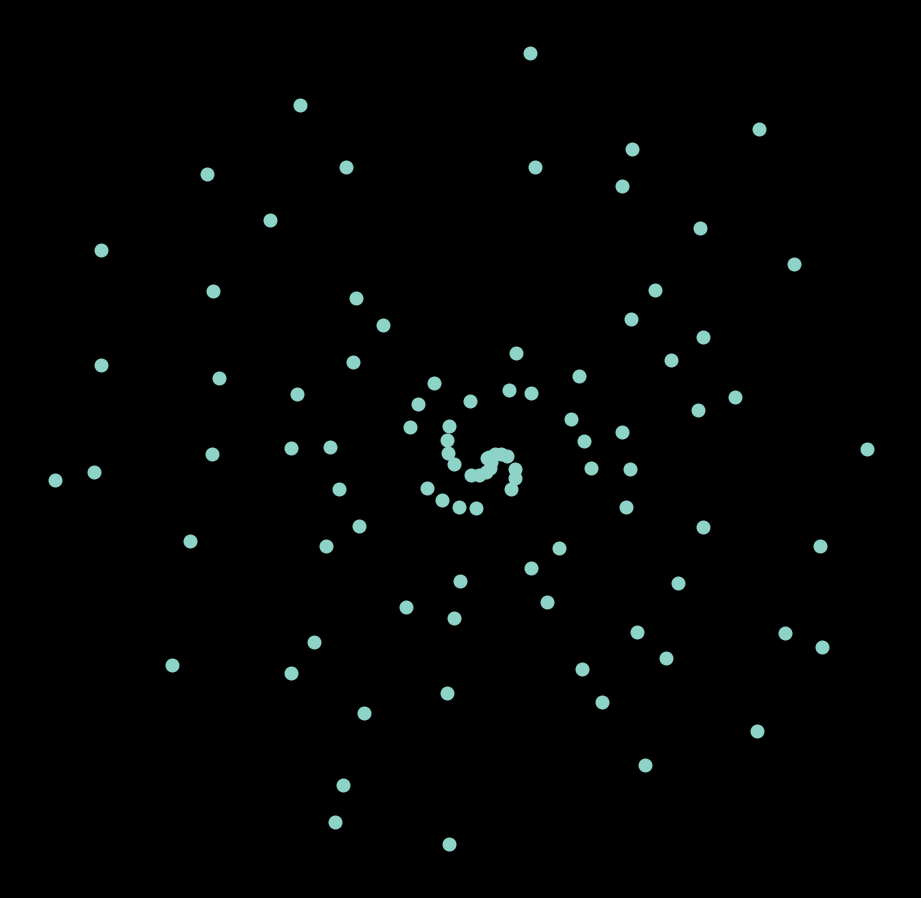

In [120]:
primes = sympy.primerange(0, 500)
create_plot(primes)

It's a little bit unclear, but it seems like there might be a pattern here. If we plot this for 10000 prime numbers, a beautiful pattern emerges, somewhat reminiscent of a galaxy.

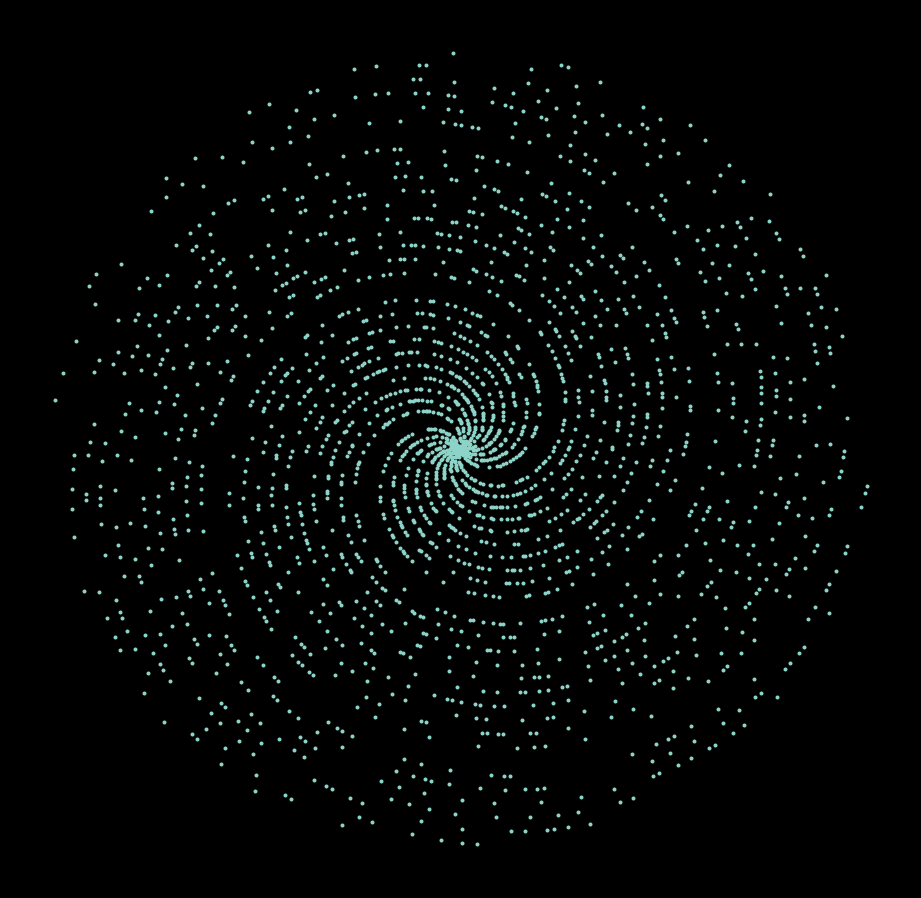

In [100]:
primes = sympy.primerange(0, 20000)
create_plot(primes, s=1)

Of course, we could go even farther. Here, I attempted a visualization with the first 400000 prime numbers. The spiral pattern is no longer present, and instead gives way to what appears to be straight lines cutting across the circular cloud of points. 

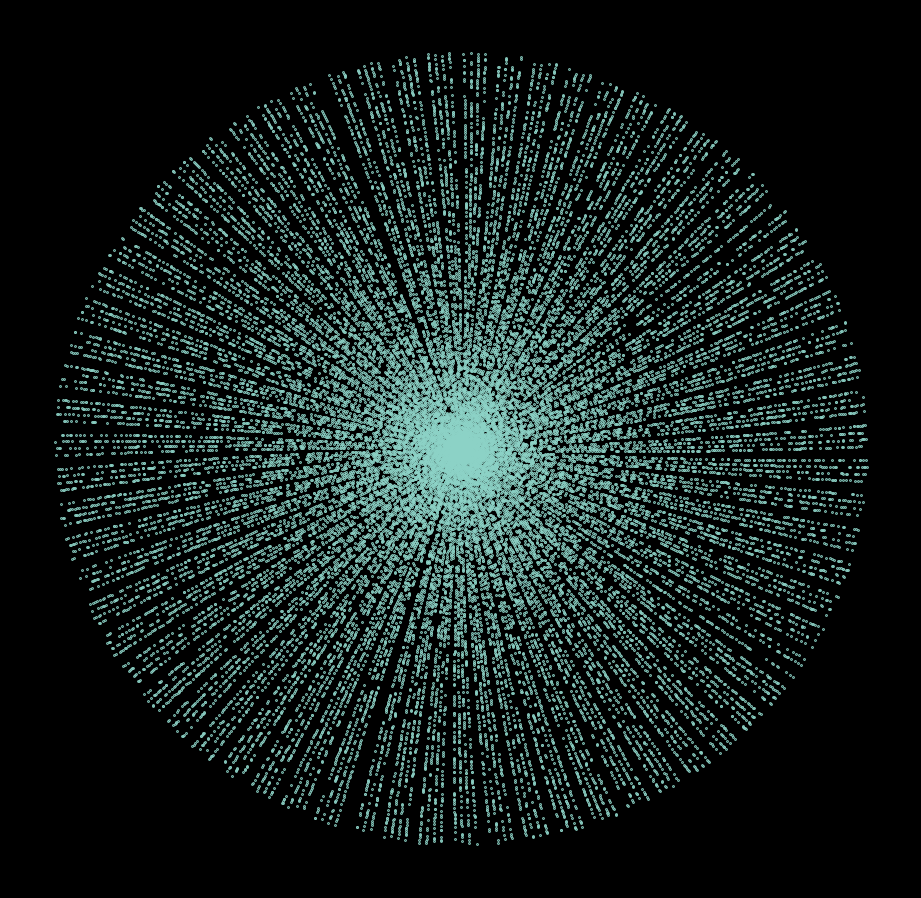

In [101]:
primes = sympy.primerange(0, 400000)
create_plot(primes, s=0.15)

# Analysis

Based on the three visualizations above, it appears that there is a clear pattern in the distribution of prime numbers. Is this some novel discovery worthy of a field medal? 

Well, you already know the answer to the question, which is obviously no. But I still think these are interesting phenomena worth diving into. 

First, let's see what happens when we simply plot all positive integers within a certain range, say, up until 1000. 

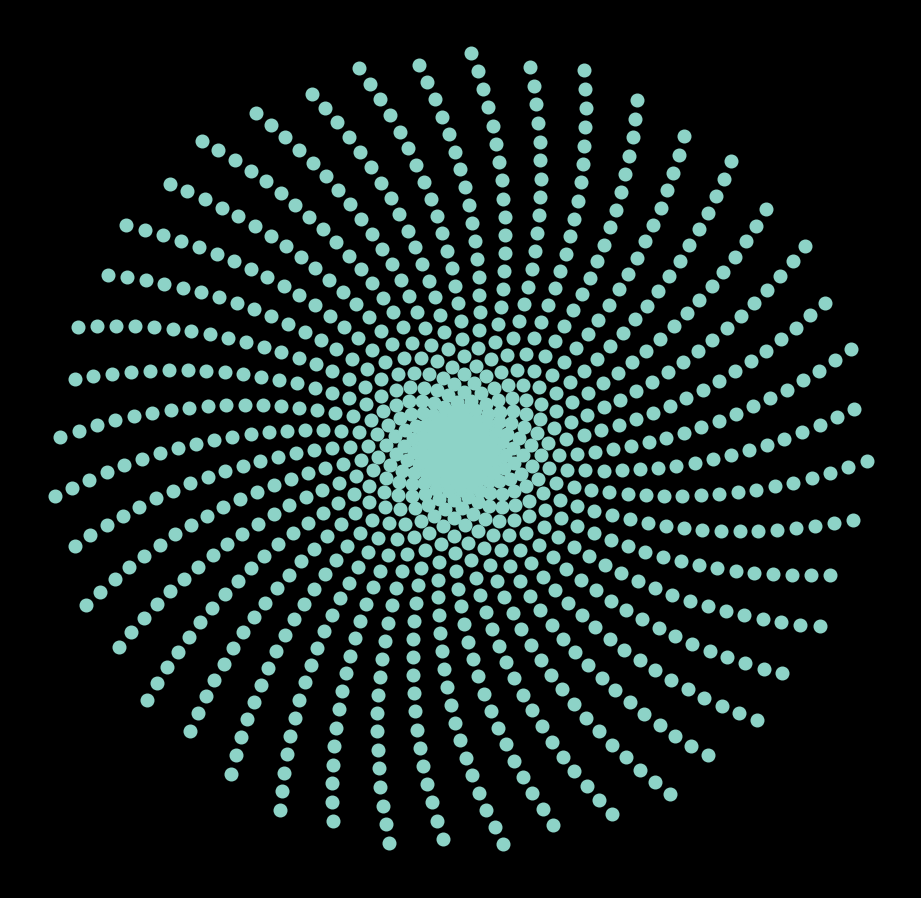

In [106]:
nums = range(1000)
create_plot(nums)

A similar spiral shape emerges, but it's more evenly distributed and symmetrical compared to the visualizations we have seen above. These spiral shapes grow larger and fuller as we plot more numbers.

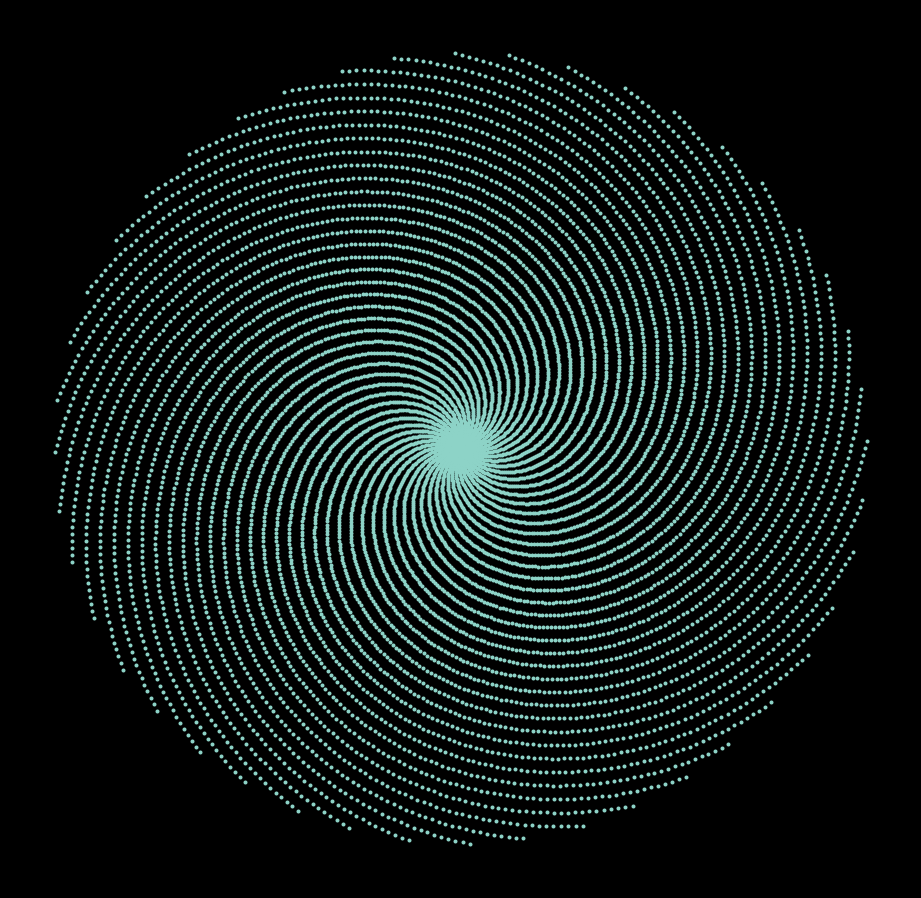

In [107]:
nums = range(10000)
create_plot(nums, s=1)

So what's clear here is that the spirals themselves have nothing to do with prime numbers; a much cleaner and fuller pattern can be seen when we plot all positive integers (as well as zero). However, where these spiral patterns are coming from has not been answered yet. Where are these patterns coming from?

Turns out that these patterns actually have to do with the rational approximation of $2\pi$!

If you meticulously count the total number of spiral patterns (I haven't myself, because my eyes started to burn after going through the first 15), you will see that there are a total of 44 spiral lines or branches. And 44 isn't the only number: at the very core of the spiral, for small numbers, there are actually only 6 arms. So a natural question to start from would be, where are all these numbers coming from?

## Geometric Interpretation

We can approach this question geometrically by considering the implication of a single spiral arm. If you think about it, what we perceive as spiral arms are produced when a number of points are plotted in some periodic fashion along the arc of a growing circle. More directly speaking, we know that the coordinate of each number takes the form of 

$$
(r, \theta) = (x, x)
$$

where $r$ and $\theta$ are radius and angle, respectively. 

This means that each adjacent points will be exactly one radian apart. This becomes obvious when we consider the coordinates of the $n$th and $(n - 1)$th points: $(n, n)$ and $(n - 1, n - 1)$. Notice that the second angle component is off by exactly one radian. 

Given this piece of observation, let's take a closer look at what is happening. 

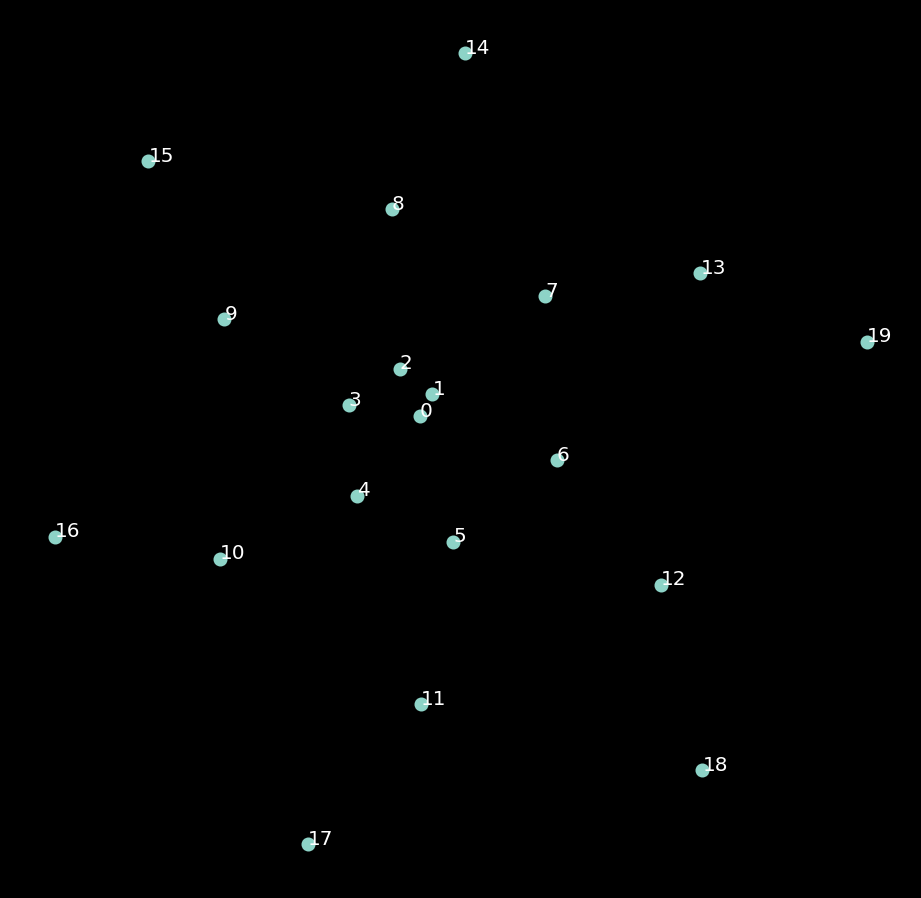

In [121]:
nums = np.array(range(20))
x, y = get_coordinate(nums)
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(x, y)
for num in nums:
    ax.annotate(num, (x[num], y[num]))
ax.axis("off")
plt.show()

Upon closer examination, we can see that each arm of the spiral forms an arithmetic sequence. Namely, 

$$
S_t = S_{t - 1} + 6
$$

For instance, what we might refer to as the first arm is a sequence whose components are 1, 7, 13, 19, and so on. 

Now we know why there are a total of 6 arms: it's because the starting element of each arm goes from 1 to 6 (or 0 to 5, depending on where you start---the sequence that starts with 0 will have 6 as its next element). 

## Connection to Full Circle

This observation yields an important insight about angles and $2\pi$: it takes six numbers for this pattern to complete a full cycle. What we perceive as a spiral pattern emerges because 6 radians is close to, but not quire, equal to $2\pi$, a full circle. If 6 radians equaled $2\pi$, then we wouldn't see spirals; instead, we would see straight lines, almost like a beam of light emanating from the origin. But because this is not the case, we see slight curvatures with each cycle of 6, and hence the spiral pattern emerges. 

In [108]:
def rad2deg(radian):
    return 180 * radian / math.pi

And we see that 6 radians is indeed fairly close to 360, or $2\pi$. 

In [109]:
rad2deg(6)

343.77467707849394

Then how about the 44 spiral arm patter that we saw when we zoomed out the picture a little more? Using the same line of logic, we 

In [115]:
print(rad2deg(44) // 360)
print(rad2deg(44) % 360)

7.0
1.0142985756224334


In other words, 44 radians is almost equal to 7 full circles, or $14\pi$. In fact, it is even more accuracy the 6 radians, since 44 radians is only off from being a multiple of $2\pi$ by approximately 1.01 degrees. This observation is often more commonly written in the form of 

$$
\frac{44}{7} \approx 2\pi
$$

Now, perhaps we can extrapolate what is going on in the last straight-line pattern we saw. Given that there is some pattern, again we can suspect that there must be some value that very closely approximates a multiple of $2\pi$. In fact, since it almost appears to be a straight line, we would expect this approximation to be even better than the ones we came up above.

And indeed, it so turns out that 710 radians is extremely close to being a multiple of $2\pi$. 

In [118]:
rad2deg(710) / 360

113.00000959524569

In fact, we see here that 710 radians is almost equal to a 113 full rotations. This is sometimes used as a rational approximation for pi. 

$$
\frac{355}{113} \approx \pi
$$

So now we've solved the first part of the puzzle: where these spiral or straight line patterns were coming from. Now, the next question worth exploring relates to why we see a sparser visualization when we plot only primes, and whether there is any mathematical insight we can glean from the patterns of sparsity. 

As you might have already guessed from the arithmetic sequence we've seen above, there are certain sequences that cannot have prime numbers. For example, in the sequences of 6, the following sequence 

$$
S = 2, 8, 14, \dots,
$$

cannot be prime, and hence is eliminated when we only plot primes. The same goes for the sequence that starts with a 3, 4, and 6. At the end of the day, we are only left with two such spiral arms. 

The story is no different when we move onto larger spiral patterns that have a period of 44 or 710. In all such cases, many spiral arms will not be present in the plot of primes due to the constraint of primality. More specifically, only numbers from 1 to 44 that are coprime with 44 will survive the filter. This is why we see much sparser spirals in the figures above. 

# Conclusion



In this post, we considered an interesting mathematical problem involving prime numbers. Prime numbers are extremely interesting, not only because they are actually used in many areas of applied maths and sciences, but also for their inherent qualities. I remember trying to derive some mathematical solution for Mersenne primes last year (of course, with no success), and I hope to study more about them moving forward. Although prime number themselves aren't difficult concepts at all, they extend to many fascinating areas of mathematics such as Dirichlet prime number theorem or the Riemann hypothesis. I hope to learn more about them in the future, 

I hope you've enjoyed today's post. Catch you up in the next one!